In [2]:
import numpy as np
from mha021 import *

In [5]:
# Problem 1

# Define inputs
L_val = 2 # m
h_val = 2e-3 # m
r_val = 30e-3 # m
G_val = 70e9 # Pa
T0_val = 300 # Nm

Ip = 2 * np.pi * r_val**3 * h_val

K = G_val * Ip * np.array([[1,-1,0],
              [-1,2,-1],
              [0,-1,1]])

f = np.array([T0_val, 0, 0]).T

bc_dofs = [3]
bc_vals = [0]

a,r = solve_eq(K, f, bc_dofs, bc_vals)
displayvar('a', a, accuracy=3)


<IPython.core.display.Math object>

Could not import Matplotlib backends. Probarbly due to missing Qt.


c:\Users\mrmar\PycharmProjects\pythonProject3\.venv\Lib\site-packages\calfem\vis_mpl.py:516: UserWarning: You passed a edgecolor/edgecolors ((0, 0, 0)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, edgecolor=color, color="none", marker=marker_type)


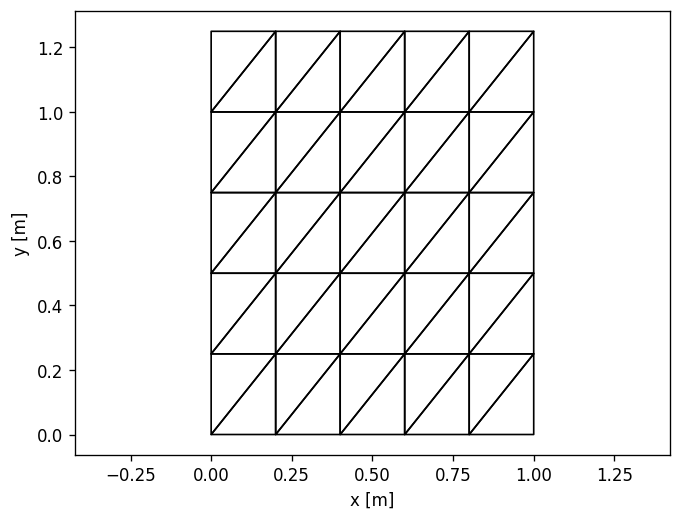

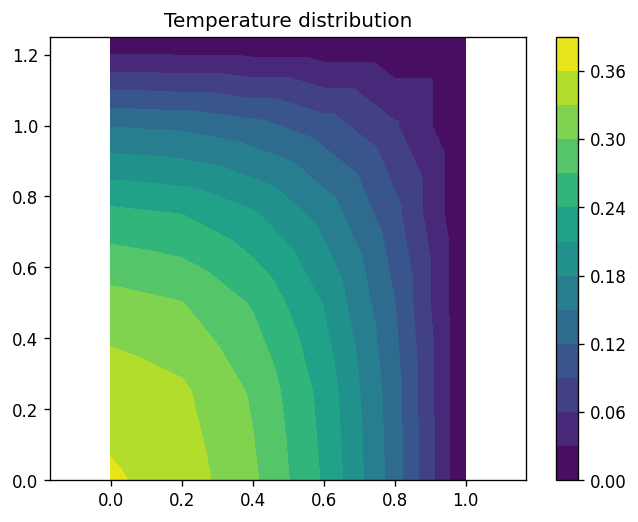

In [6]:
# problem 2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# CALFEM packages
import calfem.core as cfc
import calfem.vis_mpl as cfv

# Load mesh data
mesh = scipy.io.loadmat('mesh_data.mat') 
Coord = mesh['Coord']                         # [x, y] coords for each node
Dofs = mesh['Dofs']                           
Edof = mesh['Edof']                           # [element number, dof1, dof2, dof3]
Ex = mesh['Ex']                                
Ey = mesh['Ey']      
bottom_dofs = mesh['bottom_dofs']                          
right_dofs = mesh['right_dofs']                          
top_dofs = mesh['top_dofs']                          
left_dofs = mesh['left_dofs']                          

# Plot the mesh
plotpar = np.array([1, 1, 2]) # parameters for line style, color, marker 
cfv.eldraw2(Ex, Ey, plotpar)
plt.xlabel("x [m]")
plt.ylabel("y [m]")

# load reference solution vector
a_ref = scipy.io.loadmat('solution.mat')['solution_vector'] 
Ed = cfc.extract_ed(Edof[:, 1:4], a_ref)

# plot reference temperature, you can use this as a check against your own result.
plt.figure()
plt.title("Temperature distribution")
plt.axis("equal")
cfv.draw_nodal_values_contourf(a_ref, Coord, Edof[:, 1:4])
plt.colorbar()
plt.show()

In [ ]:
k = 1
h = 1
t = 1

D = k * np.eye(3)

num_nodes = mesh.nodes.shape[0]
num_el = mesh.elements.shape[0]
num_dofs = num_nodes

K = np.zeros((num_dofs, num_dofs))
f = np.zeros((num_dofs))

for el in range(num_el):
    nodes = mesh.nodes[mesh.elements[el-1]]
    dofs = mesh.edofs[el, :]
    
    Ke, fe = flow2t_Ke_fe(nodes, t, D, Q=h)
    assem(K, Ke, dofs)
    assem(f, fe, dofs)

bc_vals_right = np.zeros_like(right_dofs)
bc_vals_top = np.zeros_like(top_dofs)

bc_dofs = np.hstack([right_dofs, top_dofs])
bc_vals = np.hstack([bc_vals_right, bc_vals_top])

a, r = solve_eq(K, f, bc_dofs, bc_vals)

display(np.linalg.norm(a - a_ref))

In [12]:
# Problem 3
xi_val = 0.2
eta_val = 0.1

xe = sp.Matrix([0.010, 0.021, 0.015])
ye = sp.Matrix([0.014, 0.009, 0.018])
displayvar('xe', xe)

xi, eta = sp.symbols('xi, eta')

N1 = sp.Matrix([xi])
N2 = sp.Matrix([eta])
N3 = sp.Matrix([1 - xi - eta])

Ne_bar = sp.Matrix([N1, N2, N3]).T
displayvar('Ne_bar', Ne_bar)

x = Ne_bar @ xe
y = Ne_bar @ ye 

displayvar('xA', x.subs(xi, xi_val).subs(eta, eta_val))
displayvar('yA', y.subs(xi, xi_val).subs(eta, eta_val))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
scale = 1e-5

E = 210e9
t = 0.015
nu = 0.3

u1x = 4.1 * scale
u2x = 3.5 * scale
u3x = 3.8 * scale

u1y = 1.0 * scale
u2y = 1.6 * scale
u3y = 1.7 * scale

J = sp.Matrix([x, y]).jacobian(sp.Matrix([xi, eta]))

dNbar_dxi = sp.diff(Ne_bar, xi)
dNbar_deta = sp.diff(Ne_bar, eta)
dNbar_dxideta = sp.Matrix([dNbar_dxi, dNbar_deta])
displayvar('dNbar_dxideta', dNbar_dxideta)

dNbar_dxdy = (J.T).inv() @ dNbar_dxideta 
displayvar('dNbar_dxdy', dNbar_dxdy)

Be = np.zeros((3, 6))

Be[0, 0::2] = dNbar_dxdy[0, :]
Be[1, 1::2] = dNbar_dxdy[1, :]
Be[2, 0::2] = dNbar_dxdy[1, :]
Be[2, 1::2] = dNbar_dxdy[0, :]
    
displayvar('Be', Be, accuracy=3)

ae = np.array([u1x, u1y, u2x, u2y, u3x, u3y]).T

eps = Be @ ae
displayvar('epsilon', eps, accuracy=3)

D = E / (1 - nu**2) * np.array([[1, nu, 0], [nu, 1, 0], [0, 0, (1 - nu) / 2]])

sigma = D @ eps
displayvar('sigma', sigma, accuracy=3)


<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mrmar\AppData\Local\Temp\ipykernel_15784\567809397.py:42: SyntaxWarning: invalid escape sequence '\s'
  displayvar('\sigma', sigma, accuracy=3)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
b = sp.array([2 * x, 3 * x * y]) * 10**6

Ne = sp.Matrix([N1, N2, N3])